Preface: To test that the code behind the models works, I trained them on the well-known iris data set. The model took in 4 features and predicted the species.

In [145]:
# run models notebook -- similar to import
%run models.ipynb

Step 1: Load in the dataset. Since column names were missing from the original database, I had to specify them.

In [146]:
# experiment with iris data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pd.read_csv(url,names=names)
iris = iris.sample(frac=1)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
115,6.4,3.2,5.3,2.3,Iris-virginica
17,5.1,3.5,1.4,0.3,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


Step 2: Extract the input features. 

In [147]:
# select features
input_features = select_features(['sepal-length','sepal-width','petal-length','petal-width'],iris)

# normalize numerical features
input_features = normalize_features(input_features)

# recombine data    
input_data = integrate_features(list(input_features.values()))
input_data[:5]

array([[0.5833333 , 0.5       , 0.9166667 , 0.7288136 ],
       [0.22222222, 0.625     , 0.08333334, 0.06779661],
       [0.5       , 0.25      , 0.5416667 , 0.779661  ],
       [0.1388889 , 0.41666666, 0.        , 0.06779661],
       [0.16666667, 0.45833334, 0.        , 0.08474576]], dtype=float32)

Step 3: Extract labels.

In [148]:
labels = select_labels(["species"],iris)
labels[:5]

,species
115,Iris-virginica
17,Iris-setosa
134,Iris-virginica
12,Iris-setosa
37,Iris-setosa


Step 4: Convert labels to one-hot encoding for usability in the model

In [149]:
samples = len(labels)

labels_proto = []
row = 0
for record in labels['species']:
    labels_proto.append([record])
labels, labels_vocab = encode_feature(labels_proto)
labels[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Step 5: Split data into train and test sets

In [150]:
# split data into train and test sets following 80/20 rule
train_num = int(input_data.shape[0]*.8)
training_input = input_data[:train_num]
training_labels = labels[:train_num]
test_input = input_data[train_num:]
test_labels = labels[train_num:]    

# number of features and number of labels
num_features = input_data.shape[1]
num_labels = labels.shape[1]

Step 6a: Train the linear classifier. Since the species are mutually exclusive, I am using multi-class classification.

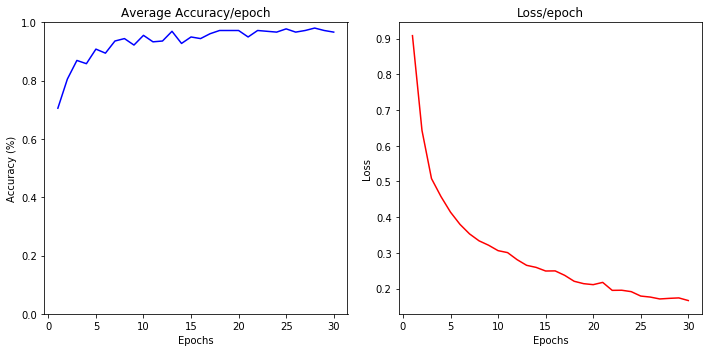

In [151]:
# create model
linear_model, linear_variables = create_linear_classifier(num_features,num_labels,"adam","multi-class",name="linear")

# path to save model
path = "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\linear model\\trained_linear_model"

# train model
train_model(training_input, training_labels, linear_model,linear_variables,learning_rate = 0.1,epochs = 30, batch_size = 10, save_path = path)

Step 6b: Train the neural net. Since the species are mutually exclusive, I am using multi-class classification.  

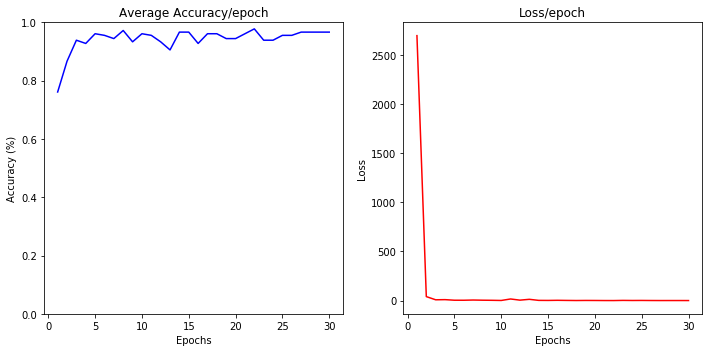

In [152]:
# create model
nn_model, nn_variables = create_vanilla_nn(num_features,num_labels,"adam","multi-class", layers = [(500,"relu"),(300,"relu"),  
                                                                                                                  (300,"relu")],name="nn")
# path to save model
path = "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\nn model\\trained_nn_model"

# train model
train_model(training_input, training_labels, nn_model, nn_variables,learning_rate = 0.1,epochs = 30, batch_size = 10, save_path = path)

Step 7a: Test linear model and extract predictions, loss, and accuracy.

In [153]:
restore_paths = {
    "metagraph": "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\linear model\\trained_linear_model.meta",
    "checkpoint": "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\linear model\\trained_linear_model"
}

predictions, accuracy, loss = test_model(test_input,test_labels, linear_variables, restore_paths)
print(predictions)
print("accuracy", accuracy)
print("loss",loss)

INFO:tensorflow:Restoring parameters from D:\noush\PycharmProjects\Accidental-Death-ML\linear model\trained_linear_model


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
accuracy 0.9777778
loss 0.19777508


Step 7b: Test vanilla net and extract predictions, loss, and accuracy.

In [154]:
restore_paths = {
    "metagraph": "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\nn model\\trained_nn_model.meta",
    "checkpoint": "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\nn model\\trained_nn_model"
}

predictions, accuracy, loss = test_model(test_input,test_labels, nn_variables, restore_paths)
print(predictions)
print("accuracy", accuracy)
print("loss",loss)

INFO:tensorflow:Restoring parameters from D:\noush\PycharmProjects\Accidental-Death-ML\nn model\trained_nn_model


[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
accuracy 0.95555556
loss 1.5515943
